In [ ]:
# # load default number img data
# from keras.datasets.mnist import load_data
# #((x_train, y_train), (x_test, y_test))
# (x_train, y_train), (x_test, y_test) = load_data()

In [2]:
from keras.datasets import fashion_mnist
# load 衣服版本
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
# display data dim
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


9


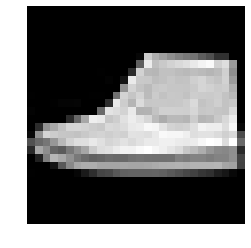

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,142,129,120,116,93,79,48,49,0,0
7,0,0,0,0,0,0,0,0,0,0,...,210,217,223,233,244,250,209,222,154,0
8,0,0,0,0,0,0,0,0,0,1,...,193,188,185,190,186,181,187,208,142,0
9,0,0,0,0,0,0,0,0,0,0,...,199,194,195,207,213,201,196,210,155,0


In [6]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [7]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 9
處理後: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1, verbose=2)
# 再run 會直接接下去

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.5669 - acc: 0.8051 - val_loss: 0.4253 - val_acc: 0.8482
Epoch 2/15
 - 1s - loss: 0.4112 - acc: 0.8573 - val_loss: 0.3884 - val_acc: 0.8563
Epoch 3/15
 - 1s - loss: 0.3647 - acc: 0.8708 - val_loss: 0.3594 - val_acc: 0.8688
Epoch 4/15
 - 1s - loss: 0.3370 - acc: 0.8796 - val_loss: 0.3452 - val_acc: 0.8755
Epoch 5/15
 - 1s - loss: 0.3189 - acc: 0.8843 - val_loss: 0.3639 - val_acc: 0.8645
Epoch 6/15
 - 1s - loss: 0.3000 - acc: 0.8914 - val_loss: 0.3319 - val_acc: 0.8783
Epoch 7/15
 - 1s - loss: 0.2875 - acc: 0.8957 - val_loss: 0.3279 - val_acc: 0.8803
Epoch 8/15
 - 1s - loss: 0.2723 - acc: 0.9021 - val_loss: 0.3100 - val_acc: 0.8887
Epoch 9/15
 - 1s - loss: 0.2624 - acc: 0.9053 - val_loss: 0.3110 - val_acc: 0.8847
Epoch 10/15
 - 1s - loss: 0.2540 - acc: 0.9070 - val_loss: 0.3061 - val_acc: 0.8895
Epoch 11/15
 - 1s - loss: 0.2440 - acc: 0.9098 - val_loss: 0.3438 - val_acc: 0.8747
Epoch 12/15
 - 1s - loss: 0.2380 - a

In [11]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 14us/step


[0.3198054087102413, 0.8877]

In [12]:
from sklearn.metrics import confusion_matrix
# 混淆舉證
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,848,2,8,10,5,1,118,0,8,0
1,3,972,0,19,3,0,3,0,0,0
2,20,0,763,12,108,0,96,0,1,0
3,32,4,10,884,38,0,27,0,5,0
4,0,1,68,20,845,0,62,0,4,0
5,0,0,0,0,0,965,0,21,2,12
6,131,2,51,22,70,0,718,0,6,0
7,0,0,0,0,0,17,0,950,1,32
8,5,0,2,4,3,2,4,6,974,0
9,0,0,0,0,0,7,1,34,0,958


In [ ]:
import numpy as np
import matplotlib
matplotlib.rcparams['font.sans-serif'] = "STHeiti"
idxs = np.nonzero(pre != y_test)[0]
idxs = idxs[1:20]
label_item = ["T恤", "褲子", "帽T", "連身裙", "外套", "涼鞋", "襯衫", "運動鞋" , "背包", "靴子"]
# 繪製比較圖
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(20, 40))
width = 6
height = int(len(idxs) / width) + 1
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + label_item[falsepre[i]] + "[O]:" + label_item[falseori[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

'E:\\python\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [14]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
# from PIL import Image
# fn = input("請輸入檔名:")
# # f = open(fn, "rb") pil 會幫開
# oriimg = Image.open(fn).convert("L")
# img = oriimg.resize((28, 28))
# img_shape = np.array(img).reshape(784) / 255
# print("預測結果:", mlp.predict_classes(np.array([img_shape])))
# oriimg